# Data Description:

Amazon Reviews data ( data source ) The repository has several datasets. For this case study, we are using the Electronics
dataset.

## Domain: 

E-commerce

## Context:

Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

## Attribute Information:

● userId : Every user identified with a unique id

● productId : Every product identified with a unique id

● Rating : Rating of the corresponding product by the corresponding user

● timestamp : Time of the rating ( ignore this column for this exercise)


## Learning Outcomes:

● Exploratory Data Analysis

● Creating a Recommendation system using real data

● Collaborative filtering


## Objective:

Build a recommendation system to recommend products to customers based on the their previous ratings for other products.

## Steps and tasks:

1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics) 

2. Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings ) 

3. Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio) 

4. Build Popularity Recommender model.

5. Build Collaborative Filtering model.

6. Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products.

8. Summarise your insights.

# (1)Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics)

In [1]:
# Importing libraries

#to perform numerical operation
import numpy as np

#to work with data frame
import pandas as pd

#importing plotting library
import matplotlib.pyplot as plt

#importing seaborn for statistical plot
import seaborn as sns

In [2]:
#reading the file as data frame

data=pd.read_csv('ratings_Electronics.csv',names=['userId','productId','Rating','timestamp'])
df=data.copy()
df.head()

,userId,productId,Rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
df.shape

(7824482, 4)

From the above we can see that 78,24,482 data points are present and 4 attributes

In [4]:
df.isnull().sum()

userId       0
productId    0
Rating       0
timestamp    0
dtype: int64

From the above we can see that there are no missing values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824482 entries, 0 to 7824481
Data columns (total 4 columns):
userId       object
productId    object
Rating       float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


### Univariate Analysis

In [6]:
df['Rating'].describe()

count    7.824482e+06
mean     4.012337e+00
std      1.380910e+00
min      1.000000e+00
25%      3.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

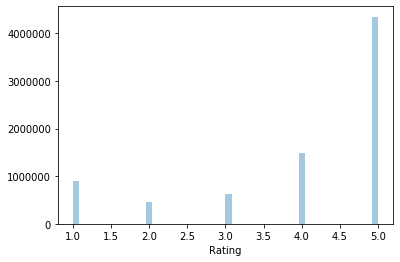

In [7]:
sns.distplot(df.Rating,kde=False)

From the above we can observe that users who have rated 5.0 is highest

# (2)Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings

In [8]:
unique_users=df['userId'].nunique()
print(unique_users)

4201696


From the above we can see that raw data contains total 42,01696 unique/distinct users

In [9]:
unique_product=df['productId'].nunique()
print(unique_product)

476002


From the above we can see that raw data contains 4,76,002 distinct products

In [10]:
# Top 10 users based on rating who have rated multiple times

most_rated = df.groupby('userId').size().sort_values(ascending=False)[:10]
most_rated

userId
A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
dtype: int64

There are multiple users who have rated more than one time.Maximum times a user have rated in the raw data is 520 times 

In [11]:
counts=df['userId'].value_counts()
counts.head()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
Name: userId, dtype: int64

Let now subset our original dataset as original data set contain many users who have rated for less number of times times and  to have good collaborative recommendations,we need many ratings from a user before we can trustworthily produce recommendations.So creating a new dataset which contain users who have rated for atleast 50 number of times.

In [12]:
counts[counts>=50].index

Index(['A5JLAU2ARJ0BO', 'ADLVFFE4VBT8', 'A3OXHLG6DIBRW8', 'A6FIAB28IS79',
       'A680RUE1FDO8B', 'A1ODOGXEYECQQ8', 'A36K2N527TXXJN', 'A2AY4YUOX2N1BQ',
       'AWPODHOB4GFWL', 'ARBKYIVNYWK3C',
       ...
       'A1PS4OYWUB0VX', 'AXU8RH1DEV21H', 'A20ZM879PCQQEZ', 'A2Y4H3PXB07WQI',
       'A1C5TCCR2IGKBU', 'A3BY5KCNQZXV5U', 'A1R3GN9MEJFXM3', 'A3JAH5WW61N2EK',
       'A3VZH0PWLQ9BB1', 'A3SP7T2PZ3HSDE'],
      dtype='object', length=1540)

In [13]:
df_final = df[df['userId'].isin(counts[counts >= 50].index)]

In [14]:
df_final.shape

(125871, 4)

From the above we can see that clearly raw datasets which had around 78 lakhs data points when subsetted with users who have rated for atleast 50 times,reduced the dataset to 1,25,871 data points.Working on this dataset will reduce the computational time.Now let us further dive deep in this dataset and check in this dataset how many unique users and unique products are available.

In [15]:
print('Number of unique USERS in final data = ', df_final['userId'].nunique())
print('Number of unique ITEMS in final data = ', df_final['productId'].nunique())

Number of unique USERS in final data =  1540
Number of unique ITEMS in final data =  48190


#### Generate matrix table from explicit ratings table

In [16]:
final_ratings_matrix = df_final.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

Shape of final_ratings_matrix:  (1540, 48190)
given_num_of_ratings =  125871
possible_num_of_ratings =  74212600
density: 0.17%


From the above we can observe that density is very less and so it is sparse.

NaNs cannot be handled by training algos, replacing these by 0, which indicates absence of ratings

In [17]:
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# Matrix with one row per 'Product' and one column per 'user' for Item-based CF
final_ratings_matrix_T = final_ratings_matrix.transpose()
final_ratings_matrix_T.head()

userId,A100UD67AHFODS,A100WO06OQR8BQ,A105S56ODHGJEK,A105TOJ6LTVMBG,A10AFVU66A79Y1,A10H24TDLK2VDP,A10NMELR4KX0J6,A10O7THJ2O20AG,A10PEXB6XAQ5XF,A10X9ME6R66JDX,...,AYOTEJ617O60K,AYP0YPLSP9ISM,AZ515FFZ7I2P7,AZ8XSDMIX04VJ,AZAC8O310IK4E,AZBXKUH4AIW3X,AZCE11PSTCH1L,AZMY6E8B52L2T,AZNUHQSHZHSUE,AZOK5STV85FBJ
productId,,,,,,,,,,,,,,,,,,,,,
0594451647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0594481813,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0970407998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0972683275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1400501466,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# (3)Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio) 

In [19]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df_final, test_size = 0.3, random_state=0)
train_data.head()

,userId,productId,Rating,timestamp
6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0,1399161600
4738241,AB094YABX21WQ,B0056XCEAA,1.0,1315267200
4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0,1355616000
3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0,1293753600
1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0,1220313600


In [20]:
print('Train data shape:',train_data.shape)
print('Test data shape:',test_data.shape)

Train data shape: (88109, 4)
Test data shape: (37762, 4)


# (4)Build Popularity Recommender model 

In [21]:
ratings_mean_count = pd.DataFrame(train_data.groupby('productId')['Rating'].mean()) 

In [22]:
ratings_mean_count['rating_counts'] = pd.DataFrame(train_data.groupby('productId')['Rating'].count())  

In [23]:
ratings_mean_count.head() 

,Rating,rating_counts
productId,,
0594451647,5.0,1
0594481813,3.0,1
0970407998,1.0,1
0972683275,5.0,3
1400501466,4.5,4


In [24]:
#Count of user_id for each unique product as recommendation score 
train_data_grouped = train_data.groupby('productId').agg({'userId':'count'}).reset_index()
#train_data_grouped.rename(columns = {'userId': 'score'},inplace=True)
train_data_grouped.rename(columns = {'userId': 'rating_counts'},inplace=True)
train_data_grouped.head()

,productId,rating_counts
0,0594451647,1
1,0594481813,1
2,0970407998,1
3,0972683275,3
4,1400501466,4


In [25]:
#Sort the products on recommendation score 
train_data_sort = train_data_grouped.sort_values(['rating_counts', 'productId'], ascending = False) 
      
#Generate a recommendation rank based upon score 
train_data_sort['Rank'] = train_data_sort['rating_counts'].rank(ascending=False, method='first') 
          
#Get the top 5 recommendations 
popularity_recommendations = train_data_sort.head(5) 
popularity_recommendations 

,productId,rating_counts,Rank
30847,B0088CJT4U,133,1.0
30287,B007WTAJTO,124,2.0
19647,B003ES5ZUU,122,3.0
8752,B000N99BBC,114,4.0
30559,B00829TIEK,97,5.0


In [26]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations 

In [27]:
find_recom = [12,101,51]   # This list is user choice.
for i in find_recom:
    print("Here is the recommendation for the user_id: %d\n" %(i))
    print(recommend(i))    
    print("\n") 

Here is the recommendation for the user_id: 12



C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


       userId   productId  rating_counts  Rank
30847      12  B0088CJT4U            133   1.0
30287      12  B007WTAJTO            124   2.0
19647      12  B003ES5ZUU            122   3.0
8752       12  B000N99BBC            114   4.0
30559      12  B00829TIEK             97   5.0


Here is the recommendation for the user_id: 101

       userId   productId  rating_counts  Rank
30847     101  B0088CJT4U            133   1.0
30287     101  B007WTAJTO            124   2.0
19647     101  B003ES5ZUU            122   3.0
8752      101  B000N99BBC            114   4.0
30559     101  B00829TIEK             97   5.0


Here is the recommendation for the user_id: 51

       userId   productId  rating_counts  Rank
30847      51  B0088CJT4U            133   1.0
30287      51  B007WTAJTO            124   2.0
19647      51  B003ES5ZUU            122   3.0
8752       51  B000N99BBC            114   4.0
30559      51  B00829TIEK             97   5.0




From the above we can see that different users also get same recommendation and this is because Popularity based reccomendation model fails personalization.Each and every user will be getting same recommendation and depends on popularity only.

# (5)Build Collaborative Filtering model

(1) Collaborative filtering is a technique that can filter out items that a user might like on the basis of reactions by similar users.It works by searching a large group of people and finding a smaller set of users with tastes similar to a particular user. It looks at the items they like and combines them to create a ranked list of suggestions.

(2)To build a system that can automatically recommend items to users based on the preferences of other users, the first step is to find similar users or items. The second step is to predict the ratings of the items that are not yet rated by a user.

(3)Collaborative filtering is a family of algorithms where there are multiple ways to find similar users or items and multiple ways to calculate rating based on ratings of similar users.

(4)User-based: For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

(5)Item-based: For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

(6) Model based approaches, which involve a step to reduce or compress the large but sparse user-item matrix.In the user-item matrix, there are two dimensions:The number of users & The number of items.


#### Model-based Collaborative Filtering: Singular Value Decomposition

In [28]:
df_CF = pd.concat([train_data, test_data]).reset_index()
df_CF.head()

,index,userId,productId,Rating,timestamp
0,6595853,A2BYV7S1QP2YIG,B009EAHVTA,5.0,1399161600
1,4738241,AB094YABX21WQ,B0056XCEAA,1.0,1315267200
2,4175596,A3D0UM4ZD2CMAW,B004I763AW,5.0,1355616000
3,3753016,AATWFX0ZZSE6C,B0040NPHMO,3.0,1293753600
4,1734767,A1NNMOD9H36Q8E,B0015VW3BM,4.0,1220313600


To experiment with recommendation algorithms,  we will need data that contains a set of items and a set of users who have reacted to some of the items.The reaction can be explicit (rating on a scale of 1 to 5, likes or dislikes) or implicit (viewing an item, adding it to a wish list, the time spent on an article).

While working with such data, we will mostly see it in the form of a matrix consisting of the reactions given by a set of users to some items from a set of items. Each row would contain the ratings given by a user, and each column would contain the ratings received by an item

In [29]:
#User-based Collaborative Filtering
# Matrix with row per 'user' and column per 'item' 
pivot_df = df_CF.pivot(index = 'userId', columns ='productId', values = 'Rating').fillna(0)
pivot_df.shape
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Observations:

In most cases, the cells in the matrix are empty, as users only rate a few items. It’s highly unlikely for every user to rate or react to every item available. A matrix with mostly empty cells is called sparse, and the opposite to that (a mostly filled matrix) is called dense.


In [30]:
pivot_df.shape

(1540, 48190)

In [31]:
pivot_df['user_index'] = np.arange(0, pivot_df.shape[0], 1)
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8,user_index
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [32]:
pivot_df.set_index(['user_index'], inplace=True)

# Actual ratings given by users
pivot_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# SVD method

(1) If the matrix is mostly empty, reducing dimensions can improve the performance of the algorithm in terms of both space and time. We can use various methods like matrix factorization or autoencoders to do this.Matrix factorization can be seen as breaking down a large matrix into a product of smaller ones

(2) The reduced matrices actually represent the users and items individually. The m rows in the first matrix represent the m users, and the p columns tell you about the features or characteristics of the users. The same goes for the item matrix with n items and p characteristics.

(3)One of the popular algorithms to factorize a matrix is the singular value decomposition (SVD) algorithm.SVD is best to apply on a large sparse matrix

(4)Based on Linear Algebra, any real matrix R can be decomposed into 3 matrices U, Σ, and V. Continuing using above example, U is an n × r user-latent feature matrix, V is an m × r item-latent feature matrix. Σ(sigma) is an r × r diagonal matrix containing the singular values of original matrix, simply representing how important a specific feature is to predict user preference.

(5)To sort the values of Σ by decreasing absolute value and truncate matrix Σ to first k dimensions( k singular values), we can reconstruct the matrix as matrix A. The selection of k should make sure that A is able to capture the most of variance within the original matrix R, so that A is the approximation of R, A ≈ R.The difference between A and R is the error that is expected to be minimized. This is exactly the thought of Principle Component Analysis. 


In [33]:
from scipy.sparse.linalg import svds
# Singular Value Decomposition
U, sigma, Vt = svds(pivot_df, k = 10)
# Construct diagonal array in SVD
sigma = np.diag(sigma)

Note that for sparse matrices, you can use the sparse.linalg.svds() function to perform the decomposition. SVD is useful in many tasks, such as data compression, noise reduction similar to Principal Component Analysis and Latent Semantic Indexing (LSI), used in document retrieval and word similarity in Text mining

In [34]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Predicted ratings
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = pivot_df.columns)
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [35]:
# Recommend the items with the highest predicted ratings

def recommend_items(userID, pivot_df, preds_df, num_recommendations):
      
    user_idx = userID-1 # index starts at 0
    
    # Get and sort the user's ratings
    sorted_user_ratings = pivot_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_ratings
    sorted_user_predictions = preds_df.iloc[user_idx].sort_values(ascending=False)
    #sorted_user_predictions

    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\nBelow are the recommended items for user(user_id = {}):\n'.format(userID))
    print(temp.head(num_recommendations))

In [36]:
#Enter 'userID' and 'num_recommendations' for the user #
userID = 12
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]



Below are the recommended items for user(user_id = 12):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.639356
B000N99BBC                  0.0          1.328095
B00829TIEK                  0.0          1.269074
B008DWCRQW                  0.0          1.145459
B004CLYEDC                  0.0          1.125218


From the above we can list of reccomended items to the particular user with user prediction

# (6)Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (RMSE) on predictions made on the test data.)

In [37]:
# Actual ratings given by the users
final_ratings_matrix.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
userId,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
# Average ACTUAL rating for each item
final_ratings_matrix.mean().head()

productId
0594451647    0.003247
0594481813    0.001948
0970407998    0.003247
0972683275    0.012338
1400501466    0.012987
dtype: float64

In [39]:
# Predicted ratings 
preds_df.head()

productId,0594451647,0594481813,0970407998,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,...,B00L5YZCCG,B00L8I6SFY,B00L8QCVL6,B00LA6T0LS,B00LBZ1Z7K,B00LED02VY,B00LGN7Y3G,B00LGQ6HL8,B00LI4ZZO8,B00LKG1MC8
0,0.002661,0.003576,0.004050,0.006906,0.003967,0.003073,0.005782,0.000568,0.014386,0.002708,...,6.108890e-04,0.044224,0.002919,0.060347,-0.002137,0.006751,0.001525,0.130951,0.059243,0.015014
1,0.002262,0.002505,0.005136,0.016517,0.007120,0.001438,0.013258,0.000335,-0.003781,0.001190,...,2.024793e-04,0.029213,0.000010,0.000244,-0.003111,-0.000621,0.004409,-0.039241,-0.006889,0.003696
2,-0.001600,-0.002502,0.002186,0.016742,0.006716,-0.002113,0.005805,0.003497,-0.005009,-0.001588,...,-3.240446e-04,0.009180,-0.002459,-0.016922,0.019936,-0.002483,-0.000155,-0.002889,-0.011522,-0.004525
3,0.002732,0.003867,0.001799,0.009395,0.004075,0.002778,0.003507,0.000095,0.007983,0.002381,...,6.031462e-04,-0.003369,0.003433,-0.003428,-0.000750,0.000119,0.002612,-0.015107,-0.006740,0.003276
4,0.000704,0.000085,0.002051,0.009664,0.004438,0.000335,0.005992,0.001056,-0.000369,0.000373,...,3.745108e-08,-0.001140,-0.000323,-0.025215,0.004700,-0.002170,0.001263,-0.048555,-0.016301,-0.003377


In [40]:
# Average PREDICTED rating for each item
preds_df.mean().head()

productId
0594451647    0.001542
0594481813    0.002341
0970407998    0.002597
0972683275    0.011807
1400501466    0.004848
dtype: float64

In [41]:
rmse_df = pd.concat([final_ratings_matrix.mean(), preds_df.mean()], axis=1)
rmse_df.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_df.shape)
rmse_df['item_index'] = np.arange(0, rmse_df.shape[0], 1)
rmse_df.head()

(48190, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
productId,,,
0594451647,0.003247,0.001542,0
0594481813,0.001948,0.002341,1
0970407998,0.003247,0.002597,2
0972683275,0.012338,0.011807,3
1400501466,0.012987,0.004848,4


In [42]:
RMSE = round((((rmse_df.Avg_actual_ratings - rmse_df.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.0033 



# (7) Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her habits, we will recommend 5 new products.

In [44]:
# Enter 'userID' and 'num_recommendations' for the user #
userID = 20
num_recommendations = 5
recommend_items(userID, pivot_df, preds_df, num_recommendations)


Below are the recommended items for user(user_id = 20):

                   user_ratings  user_predictions
Recommended Items                                
B0088CJT4U                  0.0          1.524522
B00829TIEK                  0.0          1.335672
B000N99BBC                  0.0          1.262374
B008DWCRQW                  0.0          1.062069
B004CLYEDC                  0.0          1.014894


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  del sys.path[0]


# (8)Summarise your insights

(1) A recommender system calculates and provides relevant content to the user based on knowledge of the user, content, and interactions between the user and the item.It thus help user to find item of their interest and also item provider to deliver their items to right user.

(2)Popularity based reccomendation system lacks personalization.Popularity based recommendation system works by recommending items viewed/purchased by most people and rated high.A list of the most popular items is considered a non personalized recommendation: the chances are that the current user might like the same items as most others do. Nonpersonalized
recommendations also include showing things ordered by date, such as showing the newest items first. Everyone who interacts with this type of recommender system receives the same list of recommendations.

(3)The next level of recommendations divides users into groups—the semi/segment personalized recommendations.We can segment groups of users in many ways: by age, by nationality, or by distinct patterns such as business people or students, car drivers or bicycle riders.This recommender system doesn’t know anything personal about you, only you as a member of a group or segment. Other people who fit into the same group will get the same recommendations.

(4)A personalized recommendation is based on data about the current user that indicates how the user has interacted with the system previously. This generates recommendations specifically for this user.

(5)Using Collaborative filtering(CF) recommendation we can make personalized reccomendation.

(6)A matrix with mostly empty cells is called sparse, and the opposite to that (a mostly filled matrix) is called dense.Sparsity and scalability are the two biggest challenges for standard (collaborative filtering)CF method.Most data sets aren’t dense enough to recommend items other than the most popular ones. Because most users only have a few ratings and often an e-shop will have thousands of different items, it can be difficult to find neighbors.

(7)Collaborative filtering based recommendation can be used for making automatic predictions about the interests of a user by collecting preferences or taste information from many users by means of collaboration.

(8)Collaborative recommendation system works well when we have large dataset.It fails during cold start.When a new item coming in, until it has to be rated by substantial number of users, the model is not able to make any personalized recommendations .

(9)A startup company can start building user profile using content based reccomendation system.Once they have sufficient data of different user then they can switch to collaborative recommendation system.

(10)Collaborative recommendation system are of two types

      (i)Users based collaborative recommendation-It find out the users who have a similar taste of products as the current user chosen.
      
      (ii)Item based collaborative recommendation-It is opposite of user based collaborative recommendation.It use the similarity between items (and not users) to make predictions
      
(11)Item-based collaborative filtering was developed by Amazon. In a system where there are more users than items, item-based filtering is faster and more stable than user-based. It is effective because usually, the average rating received by an item doesn’t change as quickly as the average rating given by a user to different items. It’s also known to perform better than the user-based approach when the ratings matrix is sparse.
